In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import xgcm
import xarray as xr
import sectionate
import regionate
import matplotlib.pyplot as plt

# Application to a global CM4 simulation

This notebook just provides another global example that focuses on the tropical oceans, to complement the previous Arctic-focused example.

## 0. Load data

In [4]:
from example_dataset_grids import load_CM4p25
ds, grid = load_CM4p25()

In [26]:
dheatdt_dynamics = (ds['T_advection_xy']*ds['areacello']).sum('z_l')
dheatdt_dynamics = dheatdt_dynamics.where(dheatdt_dynamics!=0.)

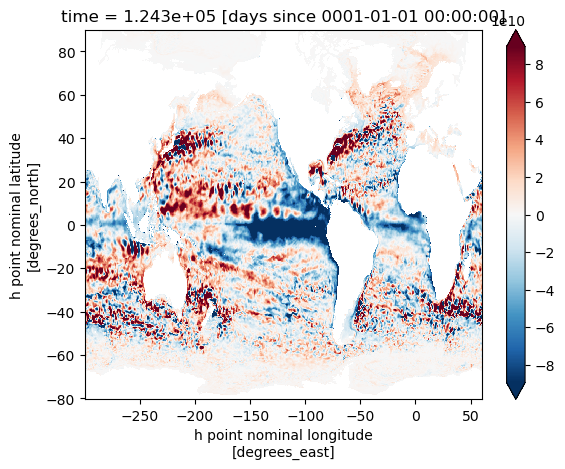

In [27]:
dheatdt_dynamics.isel(time=0).plot(robust=True)

## 1. Define a mask

In [25]:
T_threshold = 29
ds['mask'] = ds['thetao'].isel(z_l=0, time=0) > T_threshold

## 2. Convert the mask into a `regionate.Region` class instance

In [28]:
from regionate import MaskRegions
regions = MaskRegions(ds.mask, grid).regions

## 3. Visualize the mask and its boundary

In [29]:
import cmocean

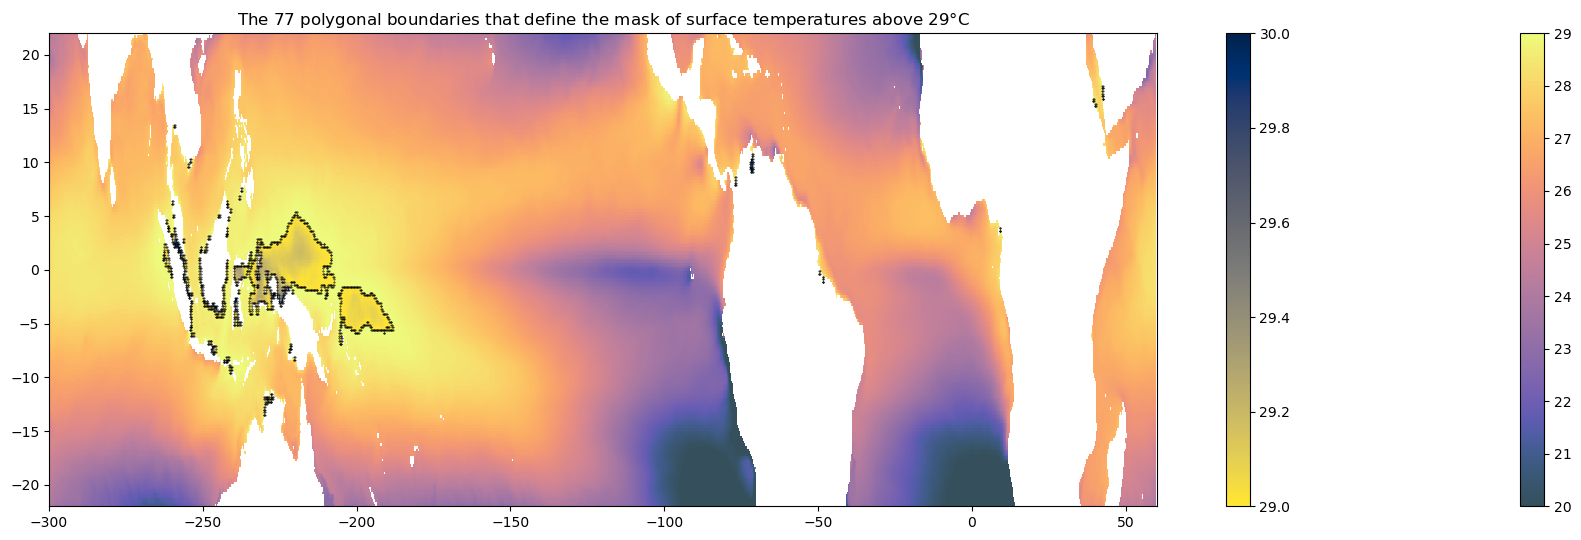

In [30]:
plt.figure(figsize=(18, 5.5))
plt.pcolormesh(
    ds['geolon_c'],
    ds['geolat_c'],
    ds['thetao'].isel(z_l=0, time=0).where(~ds.mask),
    alpha=0.8,
    cmap=cmocean.cm.thermal,
    vmin=20, vmax=T_threshold,
)
plt.colorbar()
plt.pcolormesh(
    ds['geolon_c'],
    ds['geolat_c'],
    ds['thetao'].isel(z_l=0, time=0).where(ds.mask),
    cmap="cividis_r",
    vmin=T_threshold, vmax=30.
)
plt.colorbar()
for region in regions.values():
    plt.plot(region.lons, region.lats, "k.", markersize=0.75, linewidth=0.5)
plt.ylim(-22, 22);
plt.title(f"The {len(regions)} polygonal boundaries that define the mask of surface temperatures above {T_threshold}$\degree$C");
plt.tight_layout()

## Another Example

For a lower temperature treshold with a spatial extent that spans all latitudes and crosses the model's periodic X-boundary.

In [21]:
from example_dataset_grids import load_CM4p25
ds, grid = load_CM4p25()

In [22]:
T_threshold = 25
ds['mask'] = ds['thetao'].isel(z_l=0, time=0) > T_threshold

In [23]:
from regionate import MaskRegions
regions = MaskRegions(ds.mask, grid).regions

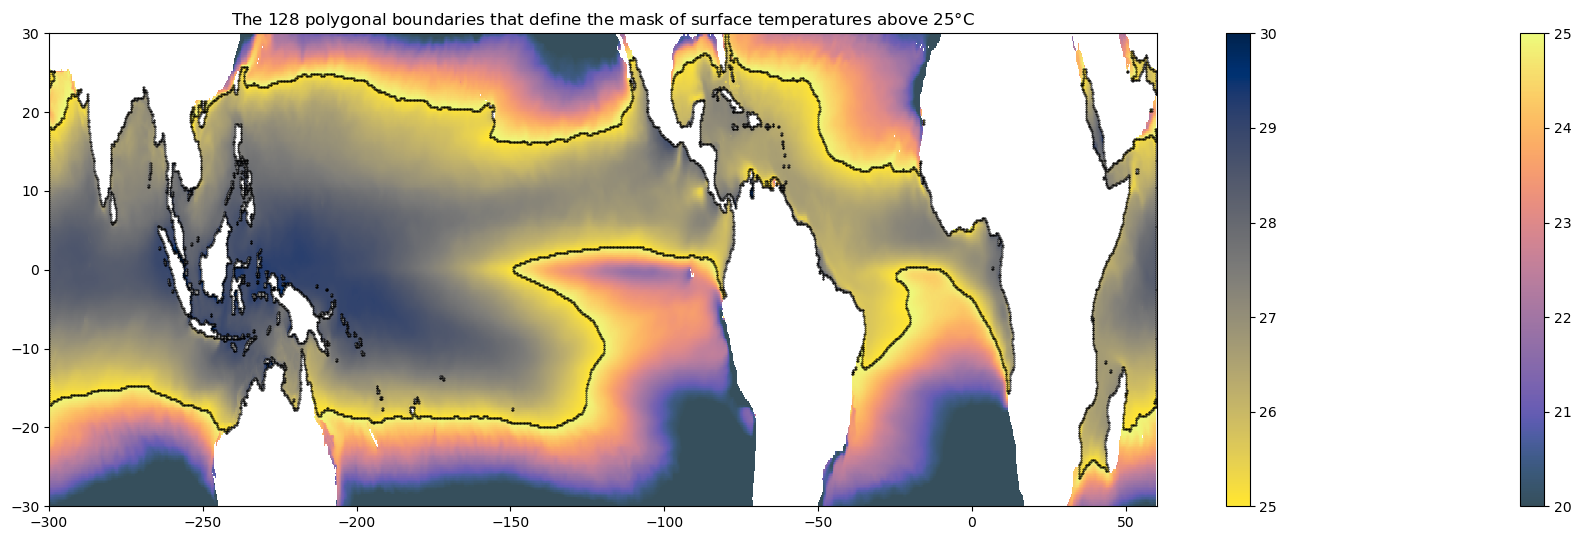

In [24]:
plt.figure(figsize=(18, 5.5))
plt.pcolormesh(
    ds['geolon_c'],
    ds['geolat_c'],
    ds['thetao'].isel(z_l=0, time=0).where(~ds.mask),
    alpha=0.8,
    cmap=cmocean.cm.thermal,
    vmin=20, vmax=T_threshold,
)
plt.colorbar()
plt.pcolormesh(
    ds['geolon_c'],
    ds['geolat_c'],
    ds['thetao'].isel(z_l=0, time=0).where(ds.mask),
    cmap="cividis_r",
    vmin=T_threshold, vmax=30.
)
plt.colorbar()
for region in regions.values():
    plt.plot(region.lons, region.lats, "k.", markersize=0.75, linewidth=0.5)
plt.ylim(-30, 30);
plt.title(f"The {len(regions)} polygonal boundaries that define the mask of surface temperatures above {T_threshold}$\degree$C");
plt.tight_layout()